In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/home/yashkrishan/Downloads/all/train.csv')
test = pd.read_csv('/home/yashkrishan/Downloads/all/test.csv')
combine = [train, test]#combining both the datasets

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Checking on the basis of age

In [6]:
#dividing the people's age into 5 groups 
train['group'] = pd.qcut(train['Age'], 5)

In [7]:
train[['Age','group']].groupby(['group'], as_index=False).mean().sort_values(by='group',ascending=True)

,group,Age
0,"(0.419, 19.0]",11.979695
1,"(19.0, 25.0]",22.675182
2,"(25.0, 31.8]",28.574803
3,"(31.8, 41.0]",35.916667
4,"(41.0, 80.0]",51.640845


Here we can see the age is divided into 5 groups, where 

- 1st group - mean age 11 
- 2nd group - mean age 22
- 3rd group - mean age 28
- 4th group - mean age 35 
- 5th group - mean age 51

In [8]:
#finding out the percentage of survived people in different age group
train[['group','Survived']].groupby(['group'], as_index=False).mean().sort_values(by='group',ascending=True)

,group,Survived
0,"(0.419, 19.0]",0.481707
1,"(19.0, 25.0]",0.328467
2,"(25.0, 31.8]",0.393701
3,"(31.8, 41.0]",0.437500
4,"(41.0, 80.0]",0.373239


##### Going by the data, about 50% of passengers before age of 19 were saved, while the percentage gets decreased in subsequent age groups

Below visualization shows the survival of people in different age groups

### Analysing on the basis of sex

In [9]:
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex',ascending=True)

,Sex,Survived
0,female,0.742038
1,male,0.188908


- The percentage of survival in females was around 74%.
- While in males was around 18%

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


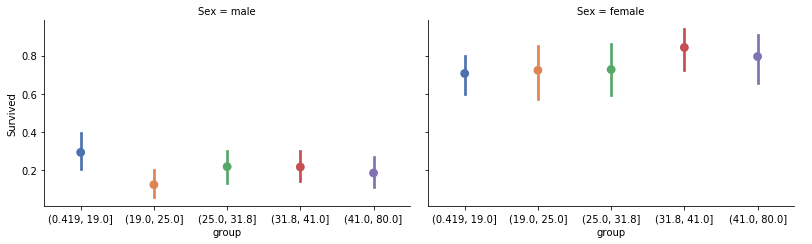

In [10]:
grid= sns.FacetGrid(train, col='Sex', size =3.5, aspect=1.6)
grid.map(sns.pointplot, 'group','Survived',palette='deep')
grid.add_legend()

#### The above visualization shows the survival percentage of females in each age group is more than the males.

### Checking on the basis of class, people survived

In [11]:
#grouping Survived data on the basis of class of the passengers 
#calculating the mean and sorting it in ascending order

train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


A/c to data people belonging of 1st class survived more and the nos. declined gradualy as we moved lower

To support the argument here are some visualisations

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


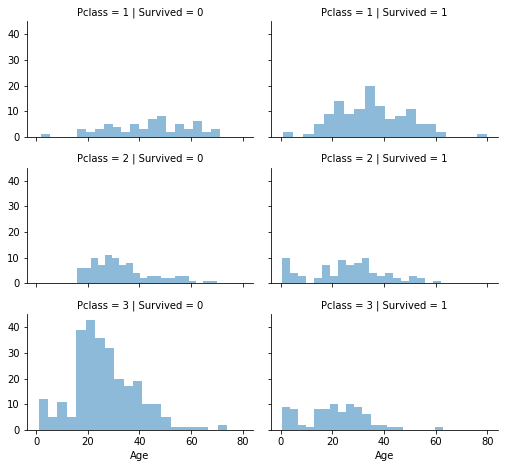

In [12]:
#using seaborn library for the visualisation and plotting histogram
#here each row of graphs shows different class value and the respective survival age distribution

grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5, bins=20)
grid.add_legend();

#### Inference from the visualization

- Class 3 has the least ratio of survived to non survived 
- Most of the people died in class 3 were of 18-40 age group 
- Class 1 has the highest ration of survived to non survived
- The survived people consisted predominantly of 20-60 age group of class 1 
  while class 3 had almost no survival above age of 40
- Class 2 has almost equal no. of survivors and deaths

### Analysing on the basis of embarkment

In [13]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


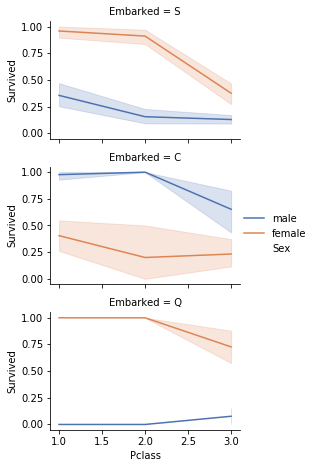

In [14]:
grid= sns.FacetGrid(train, row='Embarked', size =2.2, aspect=1.6)
grid.map(sns.lineplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

Inference from the visualiztion
- while people embarking at Southampton and Queenstown had more female survivor, intrestingle Cherbourg 
had more male survivor and female.
- the broader spectrums around the line shows the distribution of survived data with passenger class.
- Station - survival perccentage
    - C   - 55%
    - Q   - 38%
    - S   - 33%

#### Creating a new feature "FamilySize" by adding "Parch" and "SibSp"

In [15]:
#using combine helps in changing the test and train data at one time
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch'] + 1 #Plus 1, for the passenger itself

In [16]:
#relating family size with survived 
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


#### Highest survival percentage was among the family of four with 72%, 
- higher percentage in family of four can be due to apt number of women and children in the family
- larger family of 8 members or 11 members had no survivors 

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


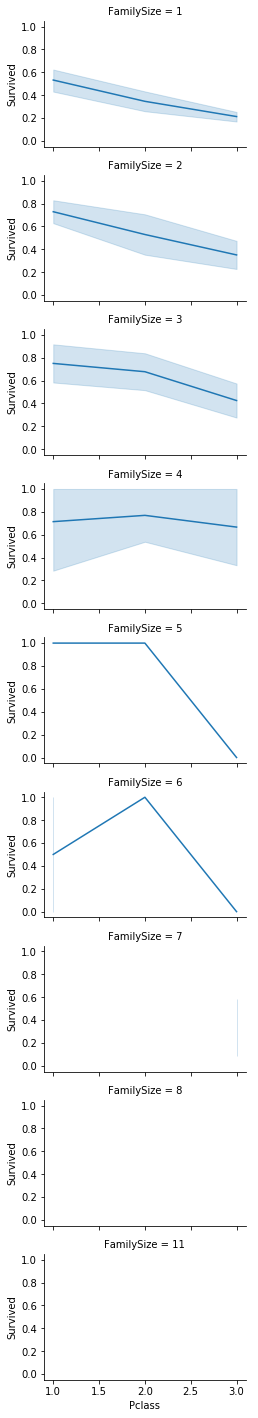

In [17]:
grid= sns.FacetGrid(train, row='FamilySize', size =2.2, aspect=1.6)
grid.map(sns.lineplot, 'Pclass','Survived',palette='deep')
grid.add_legend()

#### The above visualization points out that, the survival among all families were higher in 1st class, while the rate declined in subsequent classes.

Creating a new feature, to check the people travelling alone

In [18]:
for dataset in combine:
    dataset['Alone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'Alone'] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,group,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(19.0, 25.0]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(31.8, 41.0]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25.0, 31.8]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(31.8, 41.0]",2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(31.8, 41.0]",1,1


In [19]:
#extracts the percentage of survived people between alone and family
train[['Alone', 'Survived']].groupby(['Alone'],as_index=False).mean()

,Alone,Survived
0,0,0.505650
1,1,0.303538


### Preparing data for model prediction

In [20]:
#finding out the mode for embarked field to fill the empty values

frequent_port = train.Embarked.dropna().mode()[0]
frequent_port

'S'

In [21]:
#filling the empty values with 'S'

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(frequent_port)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,group,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(19.0, 25.0]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(31.8, 41.0]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25.0, 31.8]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(31.8, 41.0]",2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(31.8, 41.0]",1,1


In [22]:
#mapping embarked categorical data in numeric values for the model

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,group,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,"(19.0, 25.0]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,"(31.8, 41.0]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,"(25.0, 31.8]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,"(31.8, 41.0]",2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,"(31.8, 41.0]",1,1


In [23]:
#mapping numerical value for males and females for the model

for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,group,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,"(19.0, 25.0]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,"(31.8, 41.0]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,"(25.0, 31.8]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,"(31.8, 41.0]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,"(31.8, 41.0]",1,1


In [24]:
#for missing age values

import numpy as np
guess_ages = np.zeros((2,3))
#creating a temporary matrix initializing it with zeros 2*3 because age*Pclass matrix

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()#taking median for each sex and Pclass
            
            #finding out the required age and adding it to the matrix
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5 
            
    for i in range(0,2):
        for j in range(0,3):
            #adding values in the dataset
            dataset.loc[(dataset.Age.isnull())&(dataset.Sex == i)&(dataset.Pclass == j+1),'Age']=guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,group,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,"(19.0, 25.0]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,"(31.8, 41.0]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,"(25.0, 31.8]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,"(31.8, 41.0]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,"(31.8, 41.0]",1,1


In [26]:
#assigning numerical values for the age for the model
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,group,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,"(19.0, 25.0]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,"(31.8, 41.0]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,"(25.0, 31.8]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,"(31.8, 41.0]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,"(31.8, 41.0]",1,1


In [27]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,7.0000,NaN,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,NaN,2,1,1
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,8.6625,NaN,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0,3,0


In [28]:
#checking the fare distribution
train['FareBand'] = pd.qcut(train['Fare'], 4)

In [29]:
#checking the survived on the basis of fare gaps
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


##### Clearly shows people with highest fares were saved more

In [30]:
#mapping fare data into numerical categories for the model base on fareband

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

combine = [train, test]
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,group,FamilySize,Alone,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,"(19.0, 25.0]",2,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,"(31.8, 41.0]",2,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,"(25.0, 31.8]",1,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,"(31.8, 41.0]",2,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,"(31.8, 41.0]",1,1,"(7.91, 14.454]"
5,6,0,3,"Moran, Mr. James",0,1,0,0,330877,1,NaN,2,NaN,1,1,"(7.91, 14.454]"
6,7,0,1,"McCarthy, Mr. Timothy J",0,3,0,0,17463,3,E46,0,"(41.0, 80.0]",1,1,"(31.0, 512.329]"
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,349909,2,NaN,0,"(0.419, 19.0]",5,0,"(14.454, 31.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1,0,2,347742,1,NaN,0,"(25.0, 31.8]",3,0,"(7.91, 14.454]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,1,0,237736,2,NaN,1,"(0.419, 19.0]",2,0,"(14.454, 31.0]"


In [31]:
#dropping all the unneccesary data for the models
#FamilySize was dropped because of Alone field in datasets

test = test.drop(["Ticket","Cabin","Name","Parch","SibSp","FamilySize"],axis=1)
train = train.drop(["Ticket","Cabin","FareBand","Name","Parch","SibSp","FamilySize","group"],axis=1)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,1,0,3,0,1,0,0,0
1,2,1,1,1,2,3,1,0
2,3,1,3,1,1,1,0,1
3,4,1,1,1,2,3,0,0
4,5,0,3,0,2,1,0,1


In [33]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Alone
0,892,3,0,2,0,2,1
1,893,3,1,2,0,0,0
2,894,2,0,3,1,2,1
3,895,3,0,1,1,0,1
4,896,3,1,1,1,0,0


In [34]:
#final training data and prediciting data

X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"]
X_pred = test

In [36]:
#applying algorithms to predict and checking score later
#here, RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier as rf
rf = rf()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_pred)
acc_rv = round(rf.score(X_train, Y_train) * 100, 2)
acc_rv

97.64

In [37]:
#here, Support Vector Classification

from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, Y_train)
Y_pred = sv.predict(X_pred)
acc_rv = round(sv.score(X_train, Y_train) * 100, 2)
acc_rv

94.05

In [40]:
#here, LinearRegression

from sklearn.linear_model import LinearRegression as lr
lr = lr()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_pred)
acc_rv = round(sv.score(X_train, Y_train) * 100, 2)
acc_rv

94.05